In [54]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

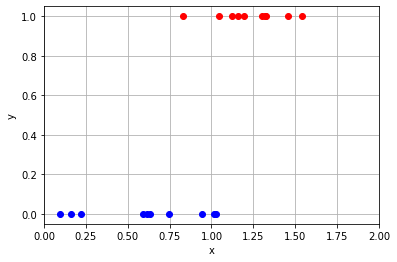

In [55]:
np.random.seed(2)

set1 = 0.8 + (2 - 0.8) * np.random.rand(10,1)
set2 = 1.2 * np.random.rand(10,1)

plt.plot(set1, np.ones(set1.shape), 'ro')
plt.plot(set2, np.zeros(set2.shape), 'bo')
plt.grid(True)
plt.xlim(0, 2)
plt.xlabel('x')
plt.ylabel('y')

X = np.vstack( (set1, set2) )

m, n = X.shape
X = np.hstack( (np.ones((m, 1)), X))

Y = np.vstack( (np.ones(set1.shape), np.zeros(set2.shape) ) )

$p(x)$ is the probability of the result being one.
It follows that the probability of being zero is $1 - p(x)$

Logistic regression models the log odds as a line.
$$\ln\left( \frac{p}{1-p} \right) = \theta_0 + \theta_1 x  = h(x)$$

$$p = \frac{1}{1+e^{-h(x)}}$$

We wwant to chose our thetas to maximize the quantity,

$$l = \prod_{i = \mbox{blue}} 1 - p(x_i) \times \prod_{i = \mbox{red}} p(x_i)$$

We can combine the products,

$$l =   \prod^m_i p(x_i)^{y_i} (1 - p(x_i))^{(1-y_i)}$$

Taking the log, we have,

$$\ln(l) = \sum_i \left[y_i \log(p) + (1-y_i) 
\log(1 - p)\right]
$$

Recall that $p(x) = h(x)$, and we need to multiply by -1 to change a max problem into a min problem.  it is also common to scale down the sum by divding by the numer of points.  This gives us the cost function.

$$J(\theta) = \frac{1}{m} \sum_i \left[-y_i \log(h_\theta(x_i)) - (1-y_i) 
\log(1 - h_\theta(x_i))\right]
$$

The gradient is given by, 
$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_i
(h_\theta(x_i) - y_i) x_{(j)}
$$

In [56]:
#  Sigmoid function as defined above.
def sigmoid(x):
    return( 1 / (1 + np.exp(-x)))

#  Our gradient descent algorithm
def gradient_sescent(fprime, x0, args = [], gamma = 1e-3, max_iter = 10000, tol = 1e-6):
    count = 0

    J = []
    while count < max_iter:
        count += 1
        #  For debugging purposes, we will append the cost function to J.  This is slow.  In a real version, should probably allocate a vector of length max_iten and place each step in its respective index.
        J.append(cost(x0, args))
        x_old = x0
        x0 = x0 - gamma * fprime(x0, args)
        if np.linalg.norm(x0 - x_old) < tol:
            break
        

    return x0, count, J

#  Cost function
def cost(theta, args):
    
    X = args[0]
    Y = args[1]
    
    m = Y.size
          
    term1 = np.multiply( -Y.T, np.log( sigmoid( np.matmul(theta.T, X.T) ) ) )
    term2 = np.multiply( (1-Y).T, np.log( 1 - sigmoid( np.matmul(theta.T, X.T)) ) )
          
    ans = 1 / m * np.sum(term1 - term2)
    #print(ans, theta) 
        
    return ans
    
#  Cost function gradient
def gradient(theta, args):
    
    X = args[0]
    Y = args[1]
    
    m = Y.size
    
    temp = sigmoid( np.matmul(theta.T, X.T) ).T - Y
    temp = np.multiply(temp, X)
    temp = 1 / m * np.sum(temp, axis = 0)
    temp.shape = (temp.size, 1)
    
    return temp

[[-10.7185688 ]
 [ 10.86992675]]


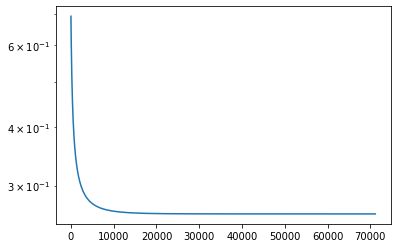

In [57]:
#  We will guess all zeros for our values of theta
theta = np.zeros( (2, 1) )

#  Run graadient descent and print the results.
theta, count, J = gradient_sescent(gradient, theta, args = [X, Y], gamma = 1e-1, max_iter = 2000000 )
print(theta)

#  Plot the cost function to make sure we have converged.
plt.semilogy(J)

In [58]:
theta0 = theta[0]
theta1 = theta[1]
h = theta0 + 1.75 * theta1
print(sigmoid(h))

[0.99975249]


We want to solve for $x$ such that,

$$\theta_0 + \theta_1 x = 0.$$

or in other words,

$$x = \frac{-\theta_0}{\theta_1}.$$

Let's calculate that value.

In [59]:
x0 = -theta0 / theta1
x0 = x0[0]
print(x0)

0.9860755312451124


Let's recreate our original figure with the training data and add our decision bounadry.

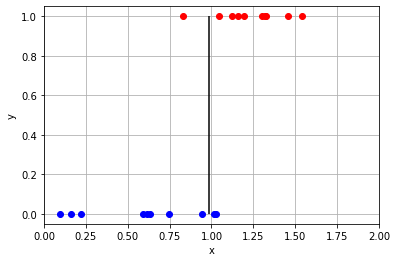

In [60]:
#  Reset the seed
np.random.seed(2)

#  Generate the data for the plots
set1 = 0.8 + (2 - 0.8) * np.random.rand(10,1)
set2 = 1.2 * np.random.rand(10,1)
#  Plot them
plt.plot(set1, np.ones(set1.shape), 'ro')
plt.plot(set2, np.zeros(set2.shape), 'bo')
plt.grid(True)
plt.xlim(0, 2)
plt.xlabel('x')
plt.ylabel('y')

#  Add in our boundary with an x position of x0
plt.vlines(x0, 0, 1)